Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.shape

(48895, 16)

Data set contains 48895 rows and 16 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Drop irrelevant features

In [7]:
## Name,ID,Host id and host name and latest review doesn't effect the price we can drop them

df.drop(columns=['id','name','host_id','host_name','last_review'],axis=1,inplace=True)

In [8]:
# Drop duplicates if there are any duplicate rows
df.duplicated().sum()

0

There are no duplicates in data so no need to drop

#### Handling Missing values

In [9]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In reviews_per_month 10052 values are missing to replace them with mean or median we don't know the eaxact reason why it is missing there may be a chance that customer don't want to give review. So fill them with 0. 

In [10]:
df['reviews_per_month'].fillna(0,inplace=True)

In [11]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

now data has no missing values

#### DESCRIPTIVE STATISTICS OF DATA

#### Finding mean,median,mode,std etc for all numeric variables

In [12]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From the above cell we can oberve mean,median,mode,min,max etc for all numerical cols

#### Visualizing the data

#### UNIVARIATE ANALYSIS

<AxesSubplot:>

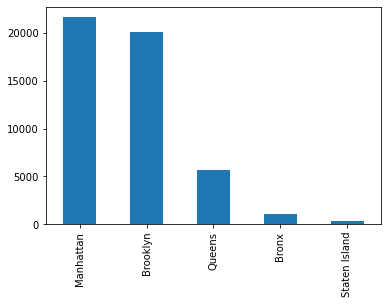

In [13]:
df['neighbourhood_group'].value_counts().plot(kind='bar')

#### Manhattan and Brooklyn neighbourhood areas has highest number of bookings in Newyork. staten island has lower no of bookings

<AxesSubplot:>

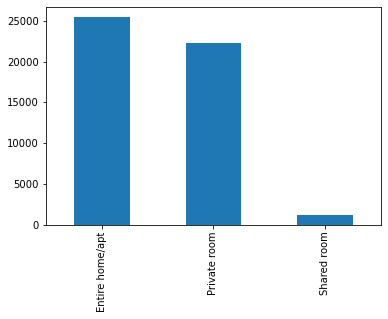

In [123]:
df['room_type'].value_counts().plot(kind='bar')

#### Most of the users booked entirehome/apt and private room .  shared room have lesser no of bookings.

<AxesSubplot:ylabel='Density'>

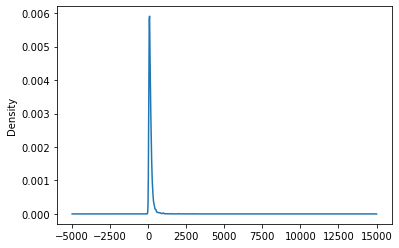

In [14]:
# Observing the price
df['price'].plot(kind='kde')

#### price range is skewed it varies from 0 to 15000

<AxesSubplot:ylabel='Density'>

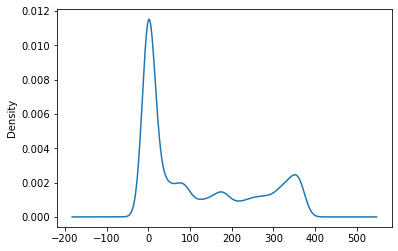

In [149]:
df['availability_365'].plot(kind='kde')

#### Bivariate analysis

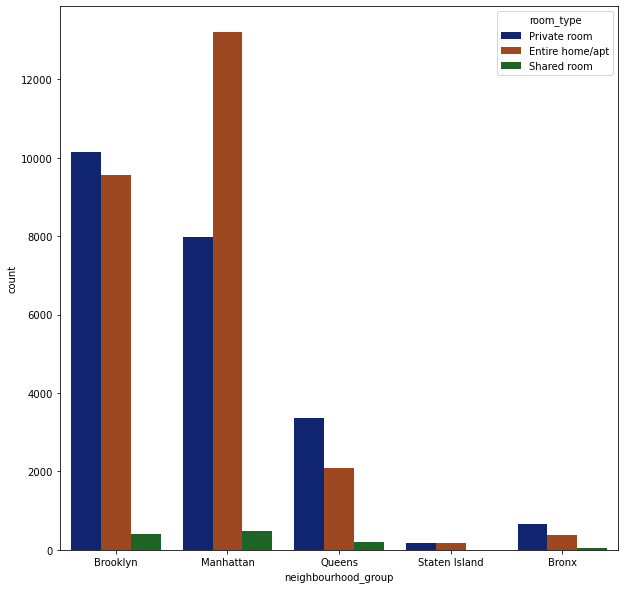

In [49]:
# analyze relation between room type and neighbourhood
plt.figure(figsize=(10,10))
sn.countplot(x=df['neighbourhood_group'],hue=df['room_type'],palette='dark')
plt.show()

#### In Brooklyn more Private rooms are booked than other types. IN manhattan entire home/ap booking is higher than other room types


In [16]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### roomtype vs availability

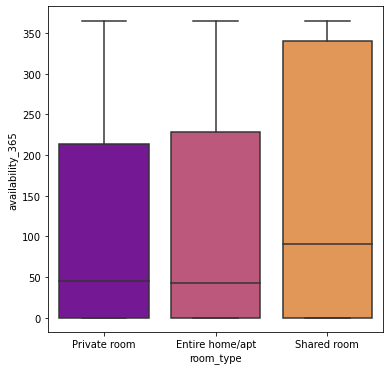

In [188]:
plt.figure(figsize=(6,6))
ax = sn.boxplot(data=df, x='room_type',y='availability_365',palette='plasma')

#### Most of the shared rooms are avilable due to less no of bookings

##### neighbourhood group vs room availability

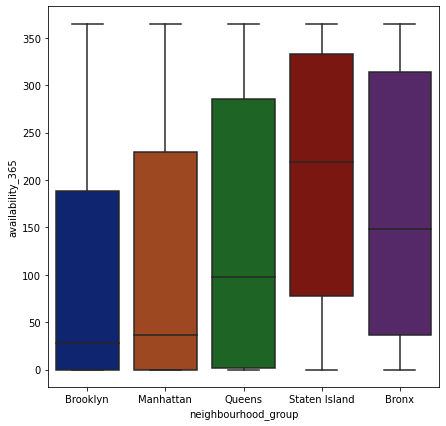

In [189]:
plt.figure(figsize=(7,7))
ax = sn.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='dark')

#### Most of the rooms are available in staten island and bronx due to less no of listings

#### Neighbour hood group vs price

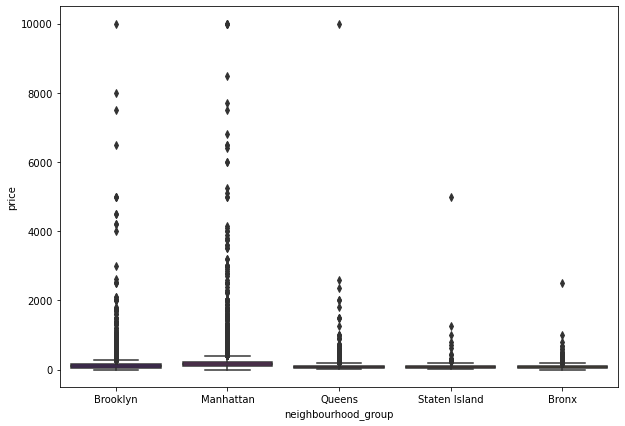

In [19]:
plt.figure(figsize=(10,7))
ax=sn.boxplot(y="price",x ='neighbourhood_group' ,data = df,palette='plasma')
plt.show()

##### it is not clealry visible due to outliers therefore see price range upto 400

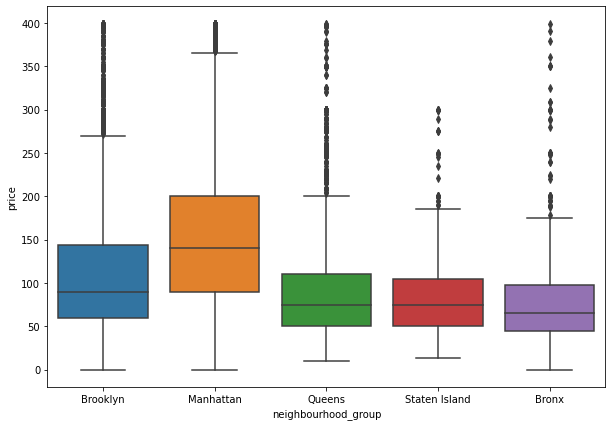

In [23]:
plt.figure(figsize=(10,7))
sn.boxplot(y="price",x ='neighbourhood_group' ,data = df[df.price<400])
plt.show()

#### we can see that price is very high in Manhattan and brooklyn neighbourhood groups. Price is very less in bronx even though it had higher price ranges but most percentile of the ranges are lied in below 200.

#### room type vs price 

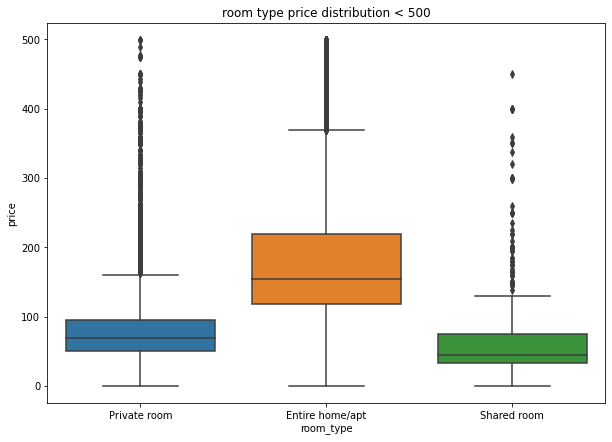

In [195]:
plt.figure(figsize=(10,7))
plt.title("room type price distribution < 500")
sn.boxplot(y="price",x ='room_type' ,data = df[df.price<500])
plt.show()

#### The price is Very high for entirehome/apt and shared room has very less price

### Multivariate Analysis

<AxesSubplot:>

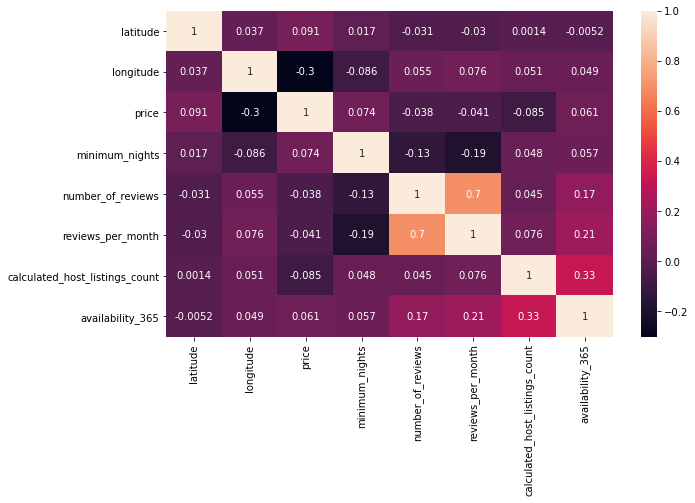

In [27]:
## Finding relationships between variables

corr = df.corr(method='kendall')
plt.figure(figsize=(10,6))
sn.heatmap(corr,annot=True)

#### we can observe reviews and reviews per month are highly correlated b/w each other but they have negative effect on price . Therefore reviews are not effecting price

#### Analyzing Geographical data

##### Visualizing density of neighbourhood group airbnb listing locations

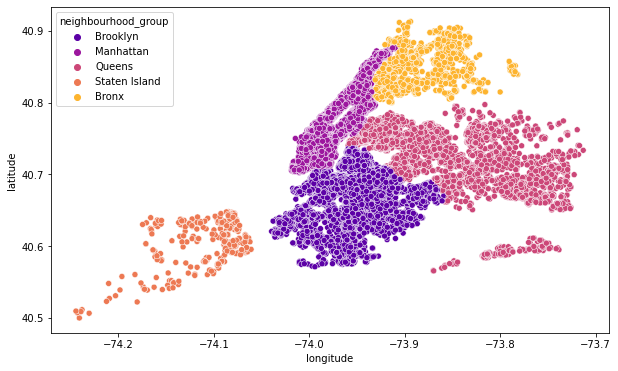

In [28]:
plt.figure(figsize=(10,6))
sn.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,palette='plasma')
plt.show()

#### Neighbourhood density

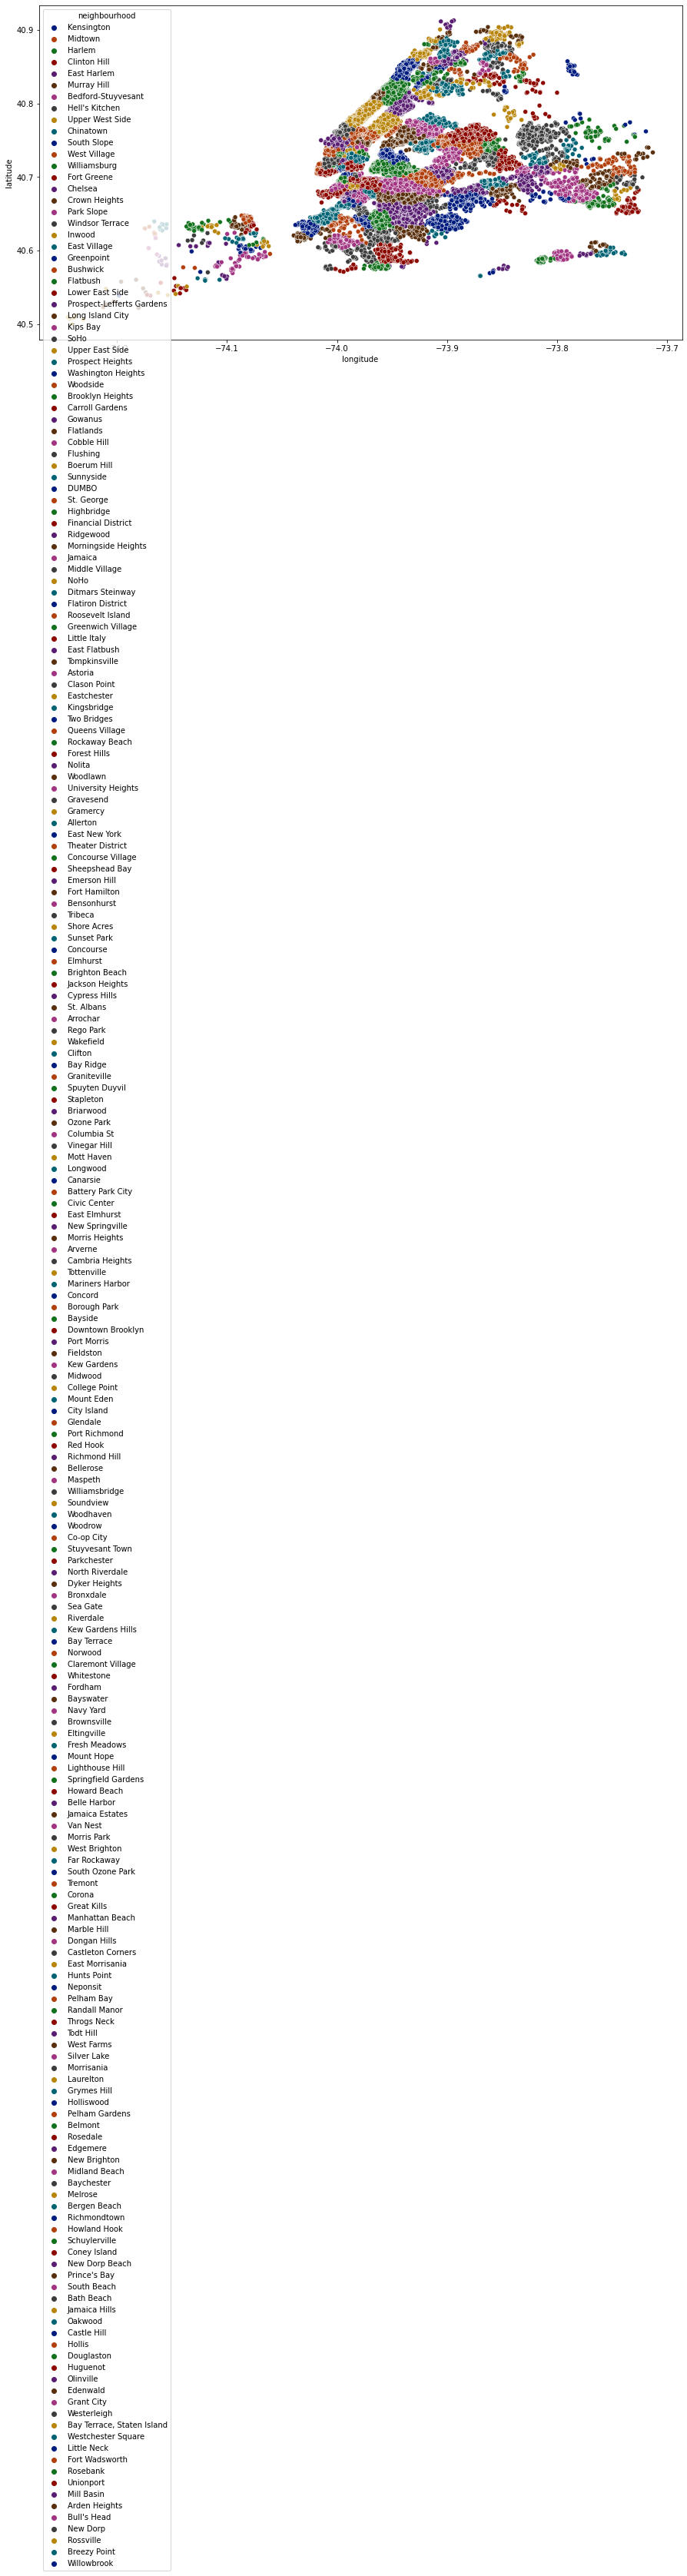

In [32]:
plt.figure(figsize=(15,8))
sn.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood,palette='dark')
plt.show()

#### Density of roomtype

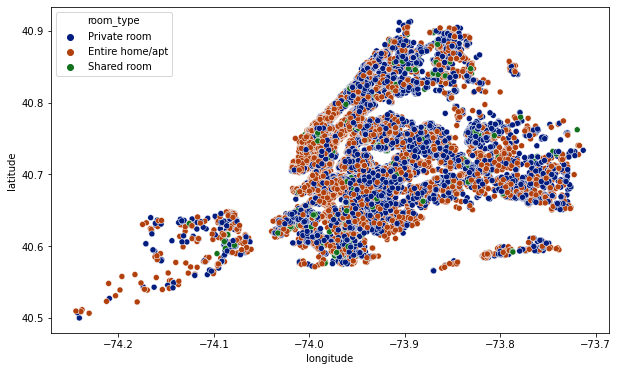

In [33]:
plt.figure(figsize=(10,6))
sn.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type,palette='dark')
plt.show()

### Ttest to see if there is significant differences in rental prices based on room type and neighbourhood group type

##### performing t-test to see, if there is significant differences in rental prices based on room type

In [34]:
from scipy.stats import ttest_ind

let's assume <br>
The null hypothesis. h0 = there is no difference b/w the mean of two groups.<br>
Alternative hypotheis ha= there is a significant difference b/w the mean of two groups.<br>
we have to find whether there is significant difference between two means of groups in ttest

In [39]:
group1= df[df['room_type'] == 'Entire home/apt']['price']
group2 = df[df['room_type'] == 'Private room']['price']

mean1 = np.mean(group1)
mean2 = np.mean(group2)

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("mean of entire home ", mean1)
print("mean of private room: ", mean2)
print("t_test value ", t_stat)
print("p-value: ", p_value)

mean of entire home  211.79424613325986
mean of private room:  89.78097285675894
t_test value  58.670889864481104
p-value:  0.0


####  From the above results we can clearly see that there is significant difference in price between two room types. And the p Value is 0.0 which is less than significance level we reject null hypothesis.

#### performing t-test to see, if there is significant differences in rental prices based on neighbourhood_type

In [40]:
from scipy.stats import ttest_ind

let's assume <br>
The null hypothesis. h0 = there is no difference b/w the mean of two groups.<br>
Alternative hypotheis ha= there is a significant difference b/w the mean of two groups.<br>
we have to find whether there is significant difference between two means of groups in ttest

In [41]:
group1= df[df['neighbourhood_group'] == 'Manhattan']['price']
group2 = df[df['neighbourhood_group'] == 'Brooklyn']['price']

mean1 = np.mean(group1)
mean2 = np.mean(group2)

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("mean of entire home ", mean1)
print("mean of private room: ", mean2)
print("t_test value ", t_stat)
print("p-value: ", p_value)

mean of entire home  196.8758136743456
mean of private room:  124.38320732192598
t_test value  30.47971595131257
p-value:  1.4649940716903273e-201


##### From the above results we can clearly see that there is significant difference in price between two neighbourhood types. And the p Value is negative which is less than significance level we reject null hypothesis.

### Analyze the customer satisfaction based on reviews

<small>Number of reviews column has outliers therefore we consider there must be no of reviews grater than 100 and less than 1000 to see plots clearly</small>

#### no of reviews vs neighbourhood group

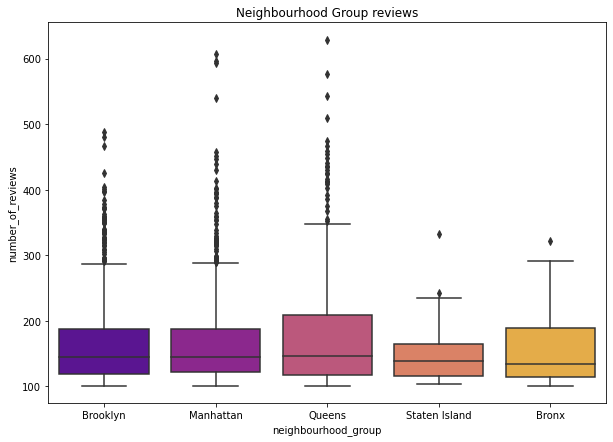

In [43]:
plt.figure(figsize=(10,7))
plt.title("Neighbourhood Group reviews")
df_reviews = df[(df.number_of_reviews < 1000) & (df.number_of_reviews > 100)]
sn.boxplot(y="number_of_reviews",x ='neighbourhood_group' ,data =df_reviews,palette='plasma')
plt.show()

From the above plot we can observe that most of the reviews are given to queens neighbour hood group type.<br>
Even though manhattan and brooklyn has higher no of airbnb listings. queens neighbour hood has higher no of reviews.<br>
It states that in queens neighbourhood there may be guests who will book for shorter periods of time and whereas in manhattan and brookloyn guests may stay for longer<br>
Most of the guests who stays in queens neighbourhood may give review when leaving. The guests in other neighbour hoods may not like to give a review this could be also one of the reason.<br>
These could be some possible assumptions we have to consider other factors also.

#### no of reviews vs room type

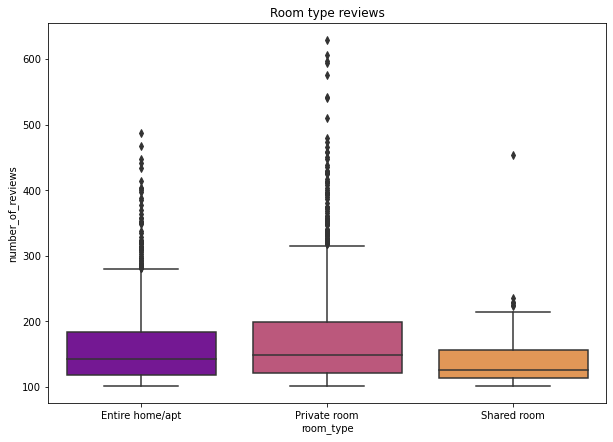

In [48]:
plt.figure(figsize=(10,7))
plt.title("Room type reviews")
df_reviews = df[(df.number_of_reviews < 1000) & (df.number_of_reviews > 100)]
sn.boxplot(y="number_of_reviews",x ='room_type' ,data =df_reviews,palette='plasma')
plt.show()

From the above plot we can observe that most of the reviews are given to private room type.<br>
Even though entire home/apt has higher no of airbnb listings. private room type has higher no of reviews.<br>
It states that in private room type there may be guests who will book for shorter periods of time and whereas in entire home/apt guests may stay for longer<br>
Most of the guests who stays in private rooms may give review when leaving. The guests in other room types may not like to give a review this could be also one of the reason.<br>
And the no of reviews are less in shared room type.<br>
These could be some possible assumptions we have to consider other factors also.

#### Recommendations to Airbnb Listings based on My observation to improve customer satisfaction

Airbnb listings must maintain the rooms very clean and good hospitality to staisfy the customers. Maintaning rooms clean may give customers good experience<br>
Most of the bookings are in manhattan and brooklyn so hosts can get maximum profit from rental prices by increasing their price.<br>
The hosts need to encourage customers to give a review before they vacate because we can observe the customer satisifaction based on number of reviews only.<br>
Hosts need to give special offers or discounts to attract customers.<br>
Hosts can adjust the prices based on type of dayas in weekends or festival seasons or holiday timings most of the customers want ot stay in rooms they can get maximum rental income by considering all these factors<br>
Hosts need to provide more facilities to the customers including wifi,AC, TV, washing machines etc. to get customer satisfaction.<br>